# Aprendizaje No Supervisado
## Nicolás Salusso - 10710

Se declara la variable **random_state** que contiene mi número de alumno. 

In [1]:
random_state = 14

### 1) Se toma el dataset del práctico pasado (digists) y se le realiza un PCA.

#### 1.1 Se carga el dataset

In [2]:
from sklearn.datasets import load_digits


digits = load_digits()

X = digits.data
y = digits.target

#### 1.2 Se normalizan los features del dataset

In [3]:
from sklearn.preprocessing import scale
X_norm = scale(X)

#### 1.3 Se realiza PCA a los features del dataset

In [4]:
from sklearn.decomposition import PCA
pca = PCA(random_state=random_state)
print(pca)
pca.fit(X_norm)
X_transformed = pca.transform(X_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=14,
  svd_solver='auto', tol=0.0, whiten=False)


#### 1.4 Se muestra como está explicada la varianza en base a los distintos componentes principales.

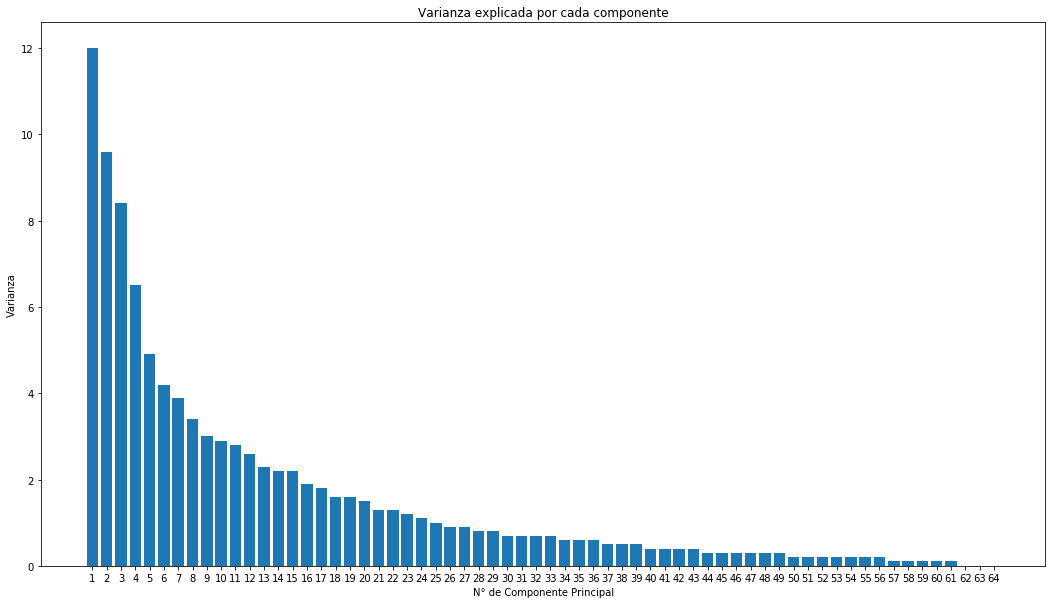

In [5]:
import numpy as np
import matplotlib.pyplot as plt
y_pos = np.arange(X_transformed.shape[1])
plt.figure(figsize=(18, 10))
plt.bar(y_pos, np.round(100 * pca.explained_variance_ratio_, decimals=1), align='center', alpha=1)
plt.xticks(y_pos, range(1, X_transformed.shape[1]+1))
plt.xlabel('N° de Componente Principal')
plt.ylabel('Varianza')
plt.title('Varianza explicada por cada componente')
plt.show()

### 2) A continuación se muestra graficamente como el primer y el segundo componente principal describen la varianza de los datos.

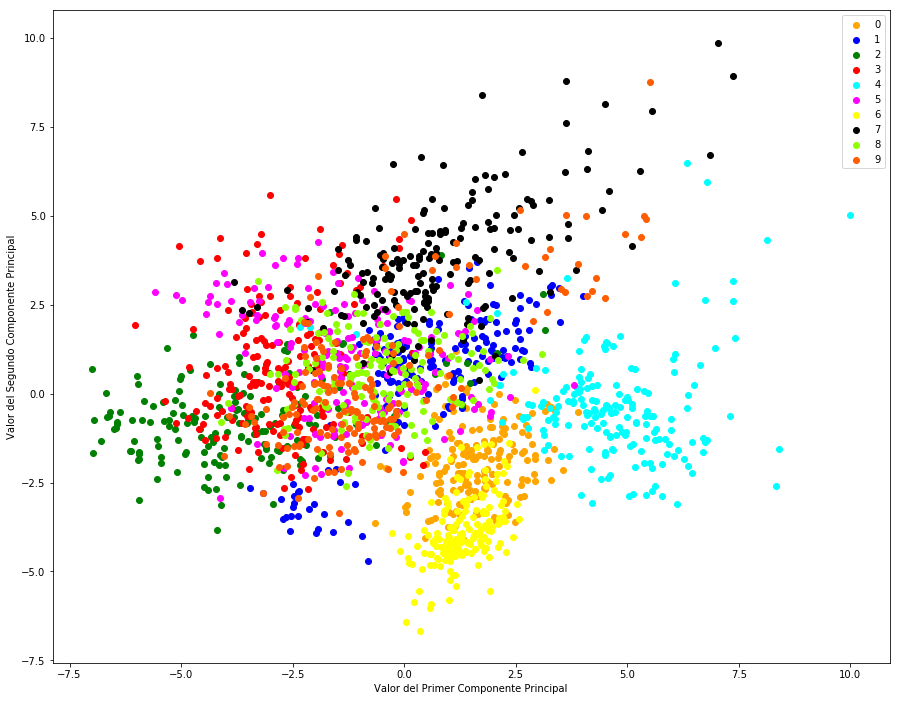

In [6]:
plt.figure(figsize=(15, 12))

plot = plt.scatter(X_transformed[y==0,0], X_transformed[y==0,1], label=digits.target_names[0], color='orange')
plot = plt.scatter(X_transformed[y==1,0], X_transformed[y==1,1], label=digits.target_names[1], color='blue')
plot = plt.scatter(X_transformed[y==2,0], X_transformed[y==2,1], label=digits.target_names[2], color='green')
plot = plt.scatter(X_transformed[y==3,0], X_transformed[y==3,1], label=digits.target_names[3], color='red')
plot = plt.scatter(X_transformed[y==4,0], X_transformed[y==4,1], label=digits.target_names[4], color='cyan')
plot = plt.scatter(X_transformed[y==5,0], X_transformed[y==5,1], label=digits.target_names[5], color='magenta')
plot = plt.scatter(X_transformed[y==6,0], X_transformed[y==6,1], label=digits.target_names[6], color='yellow')
plot = plt.scatter(X_transformed[y==7,0], X_transformed[y==7,1], label=digits.target_names[7], color='black')
plot = plt.scatter(X_transformed[y==8,0], X_transformed[y==8,1], label=digits.target_names[8], color='#90ff00')
plot = plt.scatter(X_transformed[y==9,0], X_transformed[y==9,1], label=digits.target_names[9], color='#ff5d00')

plt.xlabel('Valor del Primer Componente Principal')
plt.ylabel('Valor del Segundo Componente Principal')
plt.legend(loc='best', numpoints=1)
plt.show()

### 3) Se entrena nuevamente el clasificador SVC.

#### 3.1 A continuacion se determina que componentes principales se van a elegir. El objetivo propuesto es alcanzar representar aproximadamente el 90% de la varianza total.

In [7]:
i = 0
varianza_porcentaje = 0
while varianza_porcentaje < 90:
    varianza_porcentaje += np.round(100 * pca.explained_variance_ratio_[i], decimals=1)
    i += 1
print('Se logra alcanzar un {}% de la varianza con {} componentes principales.'.format(varianza_porcentaje, i))

Se logra alcanzar un 90.69999999999999% de la varianza con 32 componentes principales.


#### 3.2 Se ejecuta PCA para la cantidad de componentes definida anteriormente.

PCA(copy=True, iterated_power='auto', n_components=32, random_state=14,
  svd_solver='auto', tol=0.0, whiten=False)


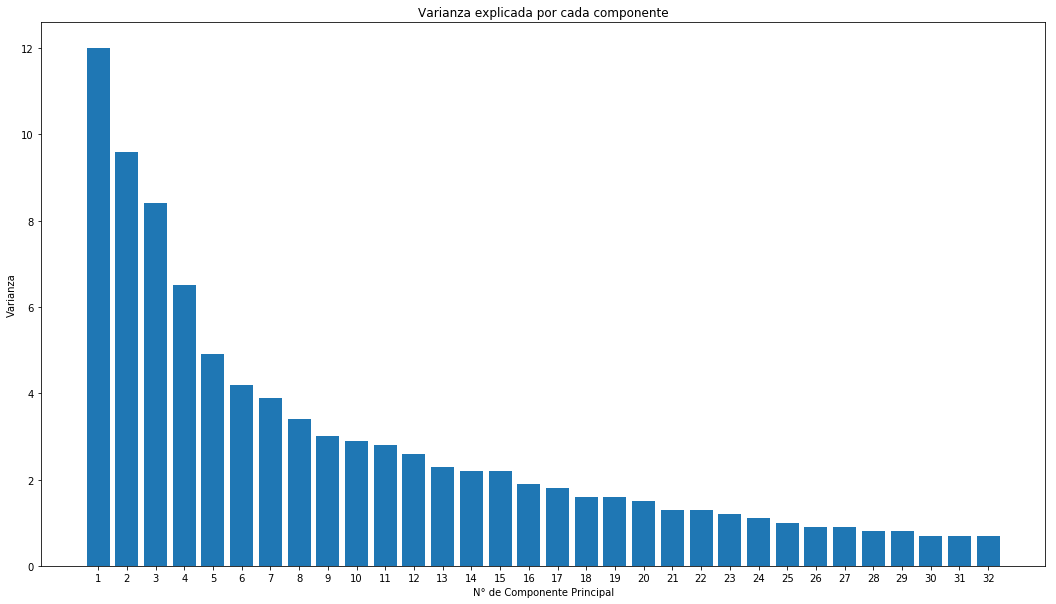

In [8]:
pca = PCA(random_state=random_state, n_components=i)
print(pca)
pca.fit(X_norm)
X_transformed = pca.transform(X_norm)
y_pos = np.arange(X_transformed.shape[1])
plt.figure(figsize=(18, 10))
plt.bar(y_pos, np.round(100 * pca.explained_variance_ratio_, decimals=1), align='center', alpha=1)
plt.xticks(y_pos, range(1, X_transformed.shape[1]+1))
plt.xlabel('N° de Componente Principal')
plt.ylabel('Varianza')
plt.title('Varianza explicada por cada componente')
plt.show()

#### 3.3 Comparación de las tasas de aciertos entre el modelo anterior (SVC) y el actual (SVC - con PCA).


3.3.1 Modelo anterior (SVC)

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

clf = SVC(random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=random_state, test_size=0.3)
print(clf.fit(X_train, y_train))
y_hat = clf.predict(X_test)
cr_SVC = metrics.classification_report(y_test, y_hat)
prf_SVC = metrics.precision_recall_fscore_support(y_test, y_hat)
ta_SVC = clf.score(X_test, y_test) 
print('Porcentaje de aciertos en la clasificación: {}\n\n{}'.format(ta_SVC, cr_SVC))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=14, shrinking=True,
  tol=0.001, verbose=False)
Porcentaje de aciertos en la clasificación: 0.9777777777777777

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        51
          1       0.93      1.00      0.96        41
          2       0.98      0.98      0.98        46
          3       1.00      0.98      0.99        51
          4       0.89      0.98      0.93        55
          5       1.00      1.00      1.00        49
          6       1.00      1.00      1.00        50
          7       1.00      0.94      0.97        62
          8       1.00      0.92      0.96        59
          9       0.99      1.00      0.99        76

avg / total       0.98      0.98      0.98       540



3.3.2 Modelo actual (SVC - con PCA)

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

clf = SVC(random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=random_state, test_size=0.3)
print(clf.fit(X_train, y_train))
y_hat = clf.predict(X_test)
cr_SVC_PCA = metrics.classification_report(y_test, y_hat)
prf_SVC_PCA = metrics.precision_recall_fscore_support(y_test, y_hat)
ta_SVC_PCA = clf.score(X_test, y_test)
print('Porcentaje de aciertos en la clasificación: {}\n\n{}'.format(ta_SVC_PCA, cr_SVC_PCA))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=14, shrinking=True,
  tol=0.001, verbose=False)
Porcentaje de aciertos en la clasificación: 0.9777777777777777

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        51
          1       0.93      1.00      0.96        41
          2       1.00      0.98      0.99        46
          3       0.98      0.98      0.98        51
          4       0.87      1.00      0.93        55
          5       1.00      1.00      1.00        49
          6       1.00      1.00      1.00        50
          7       1.00      0.94      0.97        62
          8       1.00      0.92      0.96        59
          9       1.00      0.99      0.99        76

avg / total       0.98      0.98      0.98       540



3.3.3 Comparación entre ambos modelos

Comparación de precision


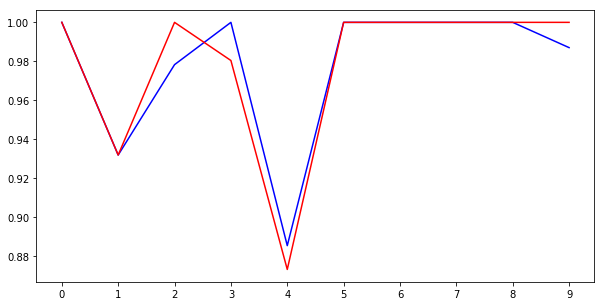

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(digits.target_names, prf_SVC[0], 'b-',  label='Sin PCA')
plt.plot(digits.target_names, prf_SVC_PCA[0], 'r-', label='Con PCA')
plt.xticks(digits.target_names)
print('Comparación de precision')
plt.show()

### 4) Respuestas

#### 4.1 A mi criterio se justifica, no solo porque se ha alcanzado a reducir la dimeción sino tambien porque brinda otra perpectiva del comportamiento de los datos que ayudan a entenderlos de una mejor manera. 

#### 4.2 Seleccionaría la cantidad de componentes mínimos, que entrenados, arrojarían la misma tasa de aciertos que un modelo sin PCA. Porque con esto se obtendrían los beneficios justificados anteriormente sin grandes modificaciones en los resultados del modelo.
Para el dataset de este trabajo práctico:


In [12]:
i = 1
tasa_acierto = 0
while tasa_acierto != ta_SVC:
    pca = PCA(random_state=random_state, n_components=i)
    pca.fit(X_norm)
    X_transformed = pca.transform(X_norm)
    
    clf = SVC(random_state=random_state)
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=random_state,
                                                        test_size=0.3)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    tasa_acierto = clf.score(X_test, y_test)
    i += 1
    
print(' {} es la menor cantidad de componentes principales que arrojan la misma tasa de aciertos, siendo la misma de {}.'.format(
    i, tasa_acierto))

 30 es la menor cantidad de componentes principales que arrojan la misma tasa de aciertos, siendo la misma de 0.9777777777777777.


FIN